# Домашнее задание "Линейная алгебра. Матрицы".

### Уровень 0:

 - Создайте матрицу 3 на 3, заполненную числами от 1 до 9
 - Прибавьте к ней матрицу с единицами на диагонале
 - Умножьте полученную матрицу на вектор (1, 2, 3)
 - Посчитайте обратную матрицу к полученной в результате прибавления матрице

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

#### Создайте матрицу 3 на 3, заполненную числами от 1 до 9

In [5]:
A = np.arange(1,10).reshape(3,3)
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

#### Прибавьте к ней матрицу с единицами на диагонале

In [8]:
I_3 = np.eye(3)
I_3

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [14]:
B = A + I_3
B

array([[ 2.,  2.,  3.],
       [ 4.,  6.,  6.],
       [ 7.,  8., 10.]])

#### Умножьте полученную матрицу на вектор (1, 2, 3)

In [11]:
vector = np.arange(1,4,1)
vector

array([1, 2, 3])

In [15]:
B * vector

array([[ 2.,  4.,  9.],
       [ 4., 12., 18.],
       [ 7., 16., 30.]])

In [16]:
vector * B

array([[ 2.,  4.,  9.],
       [ 4., 12., 18.],
       [ 7., 16., 30.]])

#### Посчитайте обратную матрицу к полученной в результате прибавления матрице

In [17]:
np.linalg.inv(B)

array([[-6. , -2. ,  3. ],
       [-1. ,  0.5,  0. ],
       [ 5. ,  1. , -2. ]])

### Уровень 1:

Дан объект в 2d пространстве:



```
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)
x = A[:,0]
y = A[:,1]

plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])
```


При помощи матричных операций выполните:
- Уменьшить объект в два раза
- Повернуть на 130 градусов
- Отразить объект относительно прямой y=x
- Выполнить смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1.2)



(-200.0, 200.0)

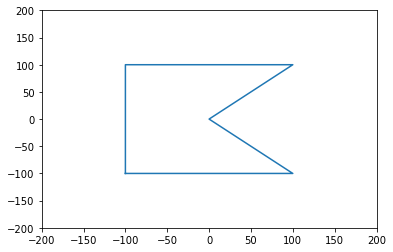

In [145]:
A = [
[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)
x = A[:,0]
y = A[:,1]

plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

#### Уменьшить объект в два раза

(-200.0, 200.0)

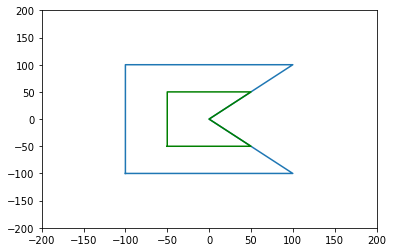

In [29]:
#умножить на диагональную матрицу со значением 0.5
B = A @ np.eye(3)/2
x_1 = B[:,0]
y_1 = B[:,1]

plt.plot(x, y)
plt.plot(x_1, y_1, c='green')
plt.ylim([-200, 200])
plt.xlim([-200, 200])

#### Повернуть на 130 градусов

In [83]:
alpha = np.pi/(180/130)
alpha

2.2689280275926285

In [84]:
C = np.array([[np.cos(alpha), -np.sin(alpha) ], [ np.sin(alpha) , np.cos(alpha) ]])
C

array([[-0.64278761, -0.76604444],
       [ 0.76604444, -0.64278761]])

In [85]:
C @ np.array([x,y])

array([[ 140.88320528,  -12.32568334, -140.88320528,    0.        ,
          12.32568334,  140.88320528],
       [ -12.32568334, -140.88320528,   12.32568334,    0.        ,
         140.88320528,  -12.32568334]])

(-200.0, 200.0)

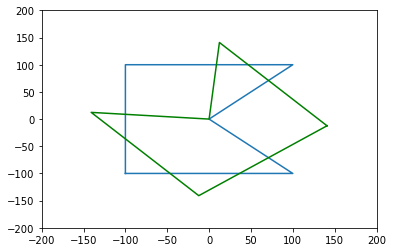

In [86]:
B = C @ np.array([x,y])

x_1 = B[0]
y_1 = B[1]

plt.plot(x, y)
plt.plot(x_1, y_1, c='green')
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [87]:
from ipywidgets import widgets
from IPython.display import display
from IPython.html.widgets import *

In [94]:
def plt_matrix_A(alpha):
    
    alpha = np.deg2rad(alpha)
    #alpha = np.pi/(180/alpha)
    
    C = np.array([[np.cos(alpha), -np.sin(alpha) ], [ np.sin(alpha) , np.cos(alpha) ]])

    B = C @ np.array([x,y])

    x_1 = B[0]
    y_1 = B[1]
    
    plt.plot(x, y)
    
    plt.plot(x_1, y_1, c='green')
    
    plt.ylim([-200, 200])
    plt.xlim([-200, 200])
   

interact( plt_matrix_A, alpha = (0,180,10) )

interactive(children=(IntSlider(value=90, description='alpha', max=180, step=10), Output()), _dom_classes=('wi…

<function __main__.plt_matrix_A(alpha)>

#### Отразить объект относительно прямой y=x

In [148]:
C = np.array( [[0,1,0], [1,0,0], [0,0,1] ])
C

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

Text(0.5, 1.0, 'Vertical Mirror')

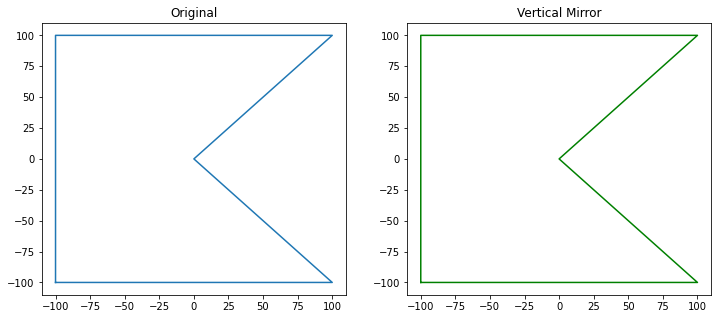

In [150]:
B = A @ C

x_1 = B[:,1]
y_1 = B[:,0]
fig = plt.figure(figsize=(12,5))
fig.add_subplot(121)
plt.plot(x, y)
plt.title('Original')
fig.add_subplot(122)

plt.plot(x_1, y_1, c='green')
plt.title('Vertical Mirror')


#### Выполнить смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1.2)

In [146]:
move_matrix = np.concatenate( (np.full([6,1],200), np.full([6,1],300), np.full([6,1],0) ), axis=1 )
move_matrix

array([[200, 300,   0],
       [200, 300,   0],
       [200, 300,   0],
       [200, 300,   0],
       [200, 300,   0],
       [200, 300,   0]])

(-200.0, 500.0)

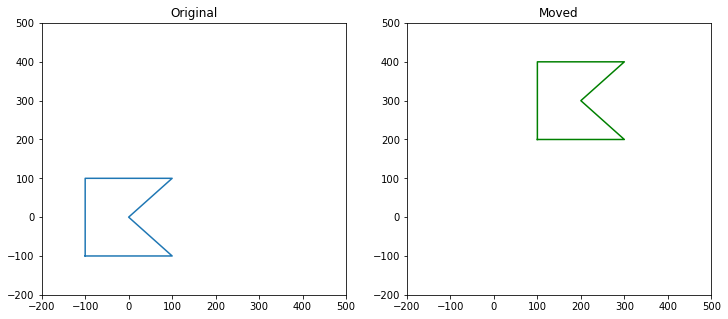

In [160]:
B = A + move_matrix

x_1 = B[:,0]
y_1 = B[:,1]

fig = plt.figure(figsize=(12,5))

#1
fig.add_subplot(121)
plt.plot(x, y)
plt.title('Original')
plt.ylim([-200, 500])
plt.xlim([-200, 500])

#2
fig.add_subplot(122)
plt.plot(x_1, y_1, c='green')
plt.title('Moved')
    
plt.ylim([-200, 500])
plt.xlim([-200, 500])

(-200.0, 500.0)

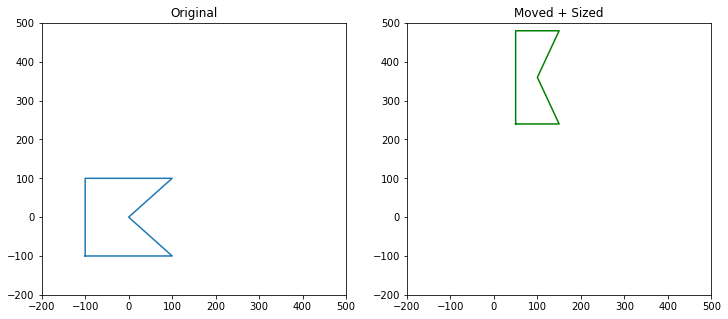

In [161]:
size_matix = [[0.5, 1.2, 1] ] 
B = B * size_matix

x_1 = B[:,0]
y_1 = B[:,1]

fig = plt.figure(figsize=(12,5))

#1
fig.add_subplot(121)
plt.plot(x, y)
plt.title('Original')
plt.ylim([-200, 500])
plt.xlim([-200, 500])

#2
fig.add_subplot(122)
plt.plot(x_1, y_1, c='green')
plt.title('Moved + Sized')
    
plt.ylim([-200, 500])
plt.xlim([-200, 500])

In [163]:
del A, B, C, x_1, y_1, move_matrix, size_matix

NameError: name 'A' is not defined